In [1]:
import os
os.chdir('C:/WorkspaceJupyter/pytorch-resnet-image-classifier')

In [3]:
import torch
from torchvision import models
from torchvision import transforms

import json
from PIL import Image


In [4]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [5]:
resnet = models.resnet101(pretrained=True, progress=True)

C:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\Hank/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 81.7MB/s] 


In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
sum([param.numel() for param in resnet.parameters()])

44549160

In [8]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [10]:
!curl https://www.princeton.edu/sites/default/files/styles/half_2x/public/images/2022/02/KOA_Nassau_2697x1517.jpg?itok=iQEwihUn > dog.jpg
!curl https://images.theconversation.com/files/443350/original/file-20220131-15-1ndq1m6.jpg > cat.jpg
!curl https://www.travelandleisure.com/thmb/XBbdZI0juZ0H7P15feQWealt0Es=/1200x0/filters:no_upscale():max_bytes(150000):strip_icc()/brussels-airlines-smurfs-plane-PLANEPAINT0418-cad802f47bad408487495abe4795ca4d.jpg > plane.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  206k  100  206k    0     0  3977k      0 --:--:-- --:--:-- --:--:-- 4134k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  314k  100  314k    0     0  1306k      0 --:--:-- --:--:-- --:--:-- 1316k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 57405  100 57405    0     0   183k      0 --:--:-- --:--:-- --:--:--  183k


In [11]:
img1 = Image.open("dog.jpg")
img2 = Image.open("cat.jpg")
img3 = Image.open("plane.jpg")

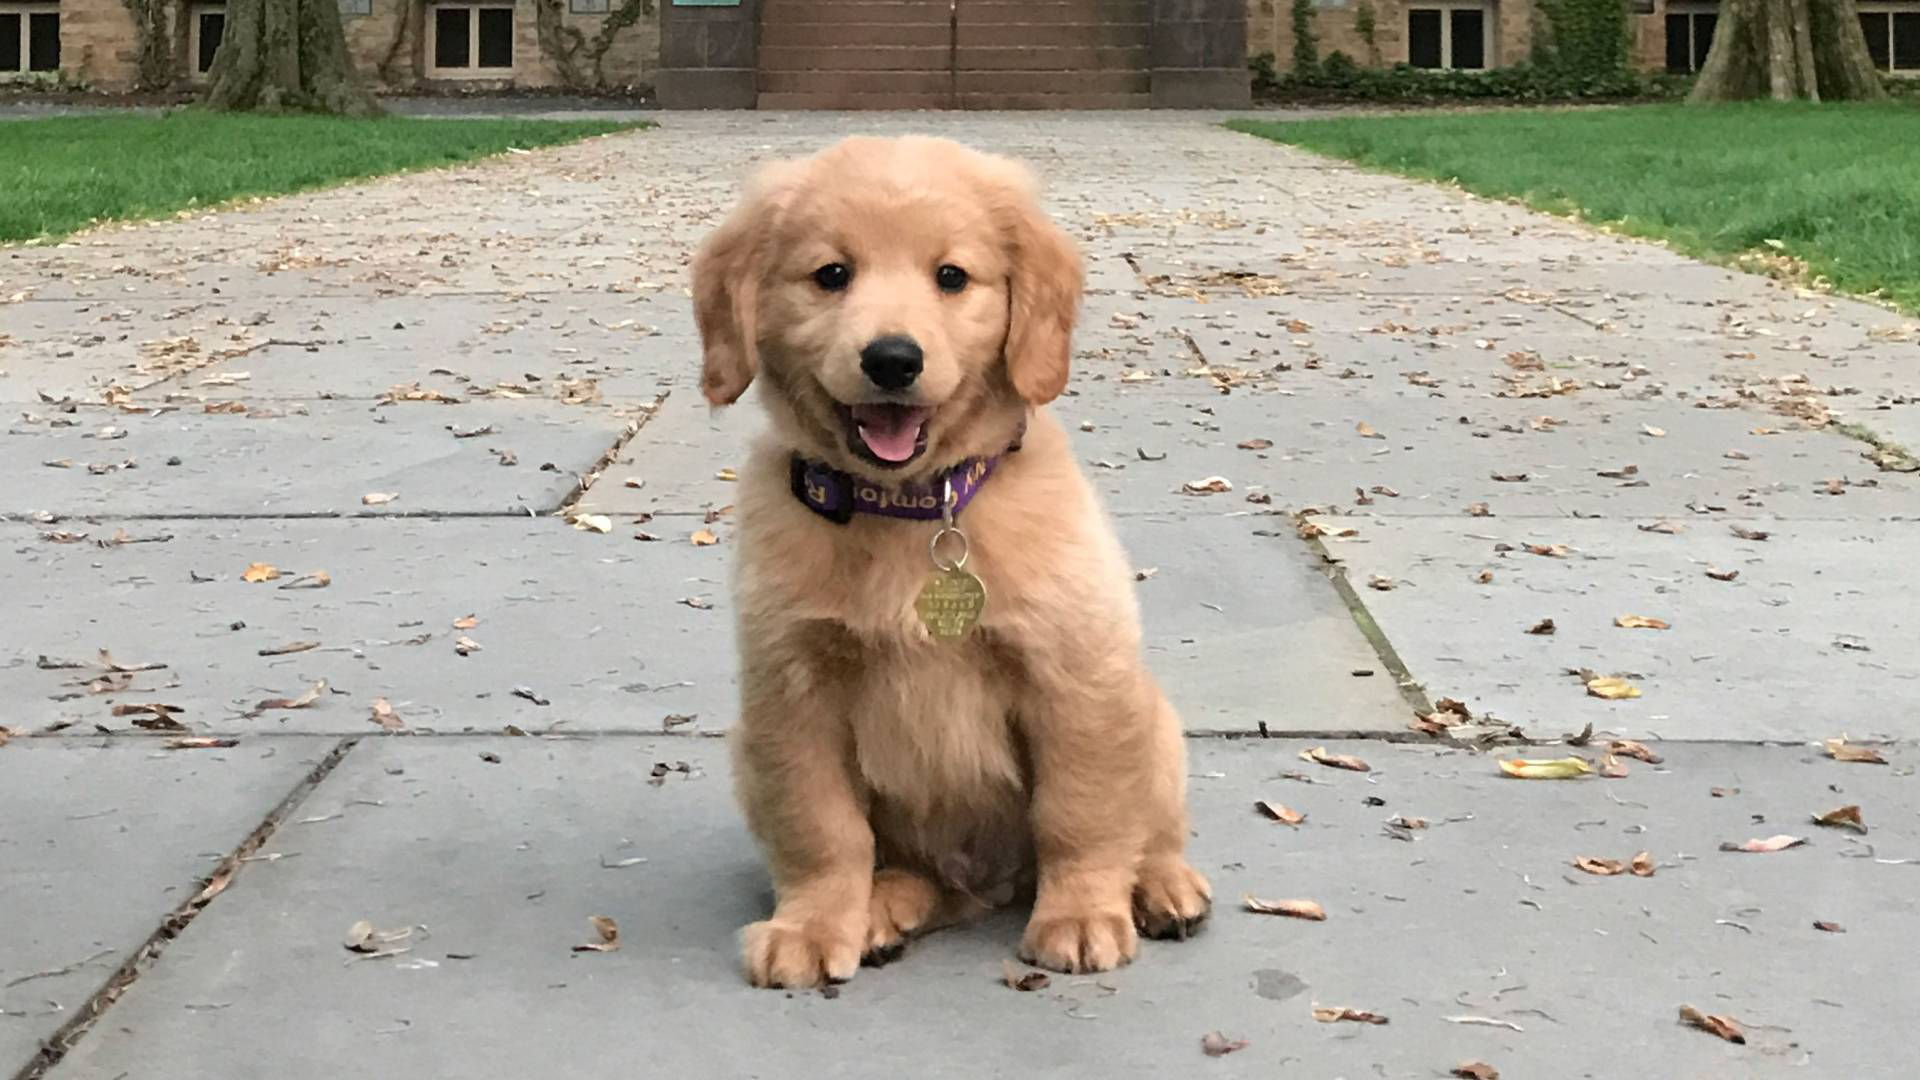

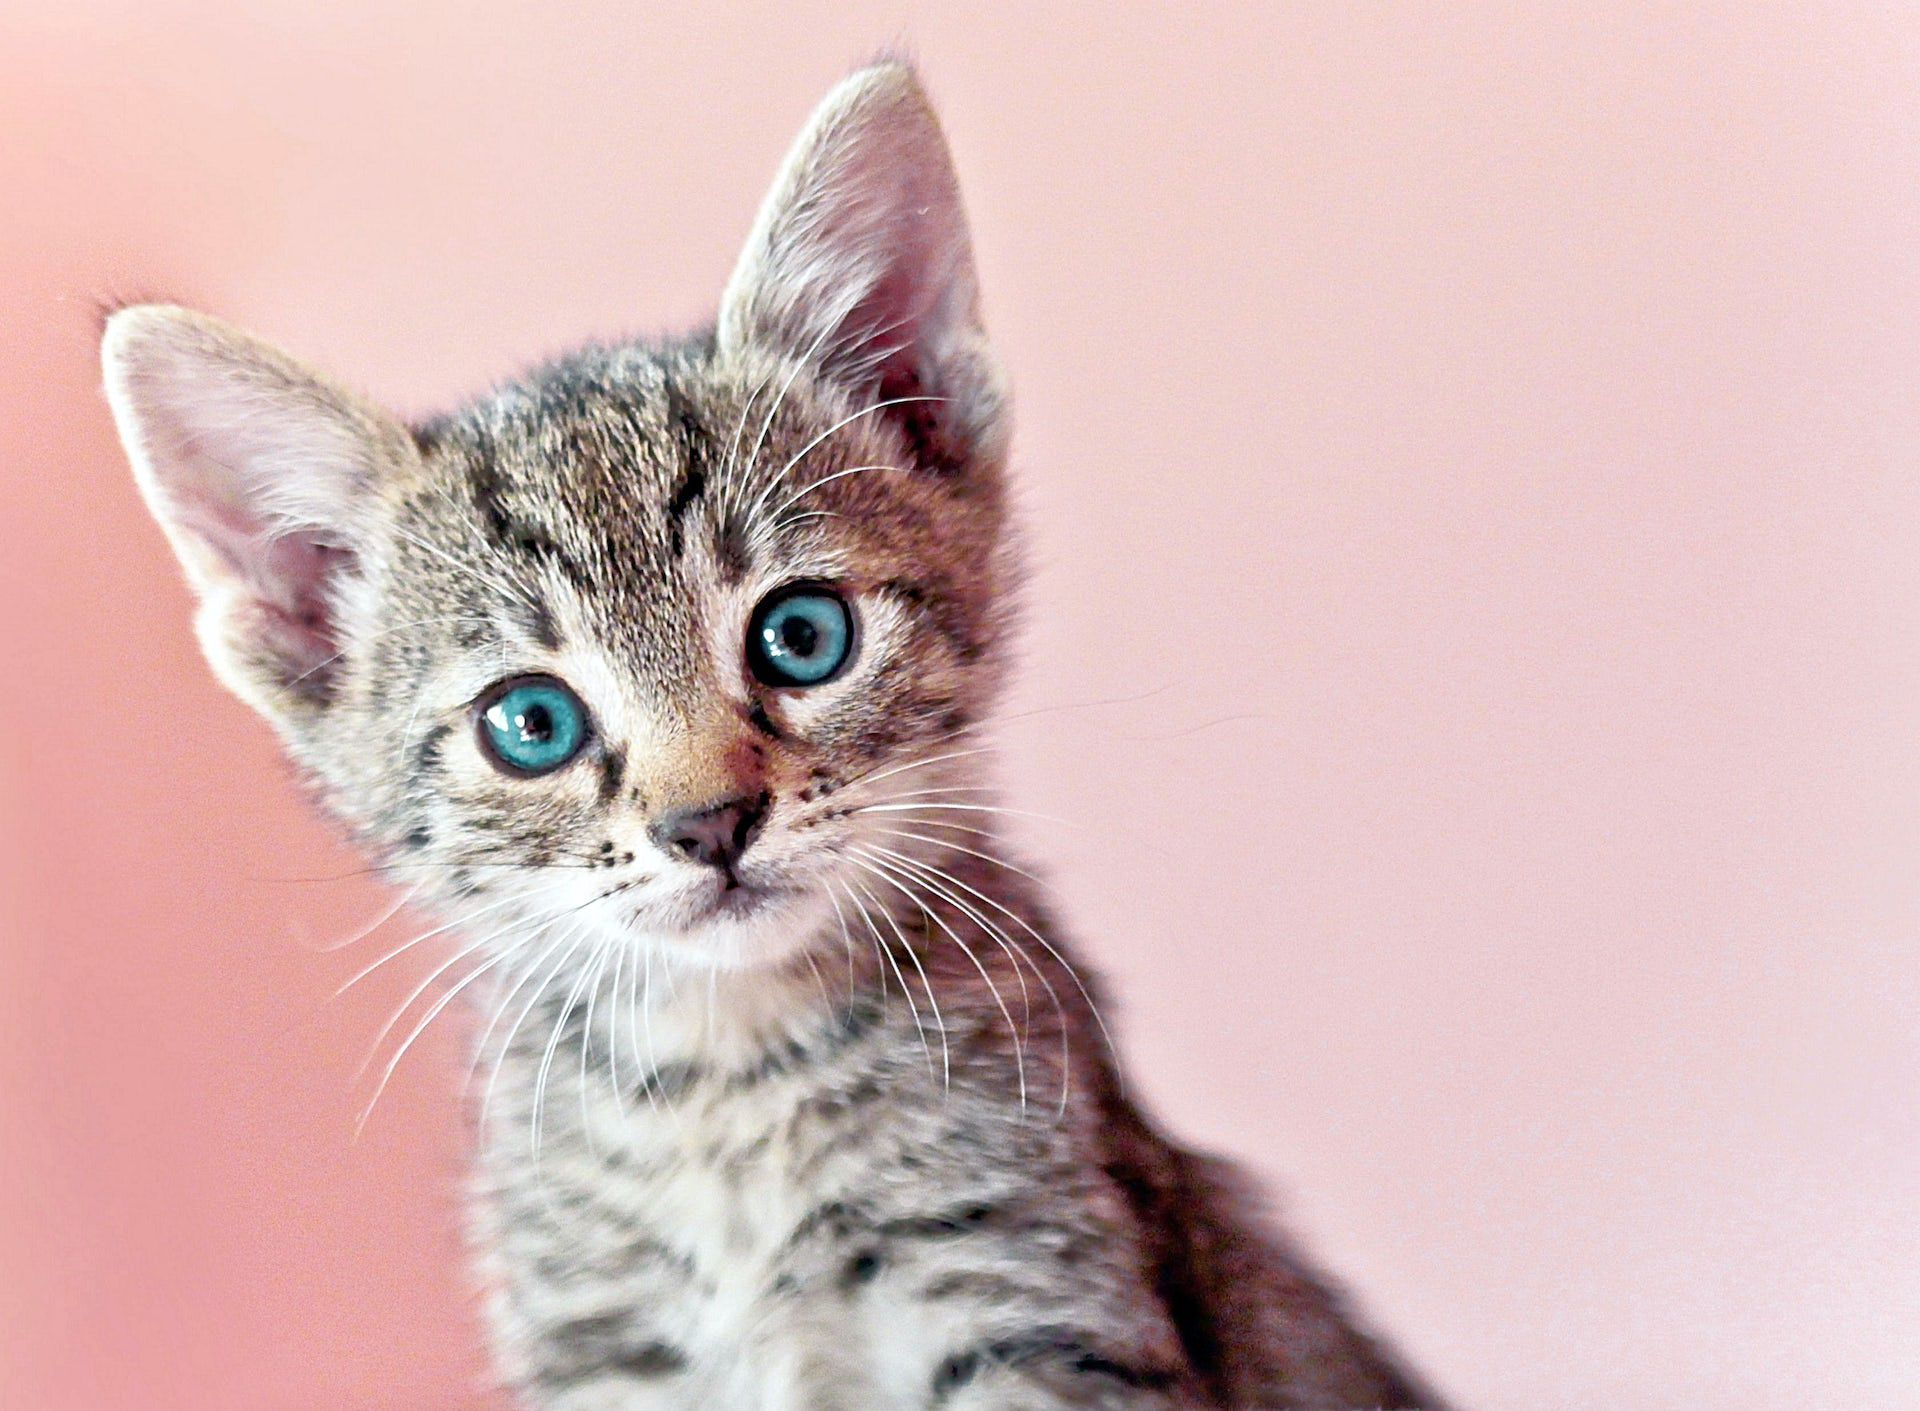

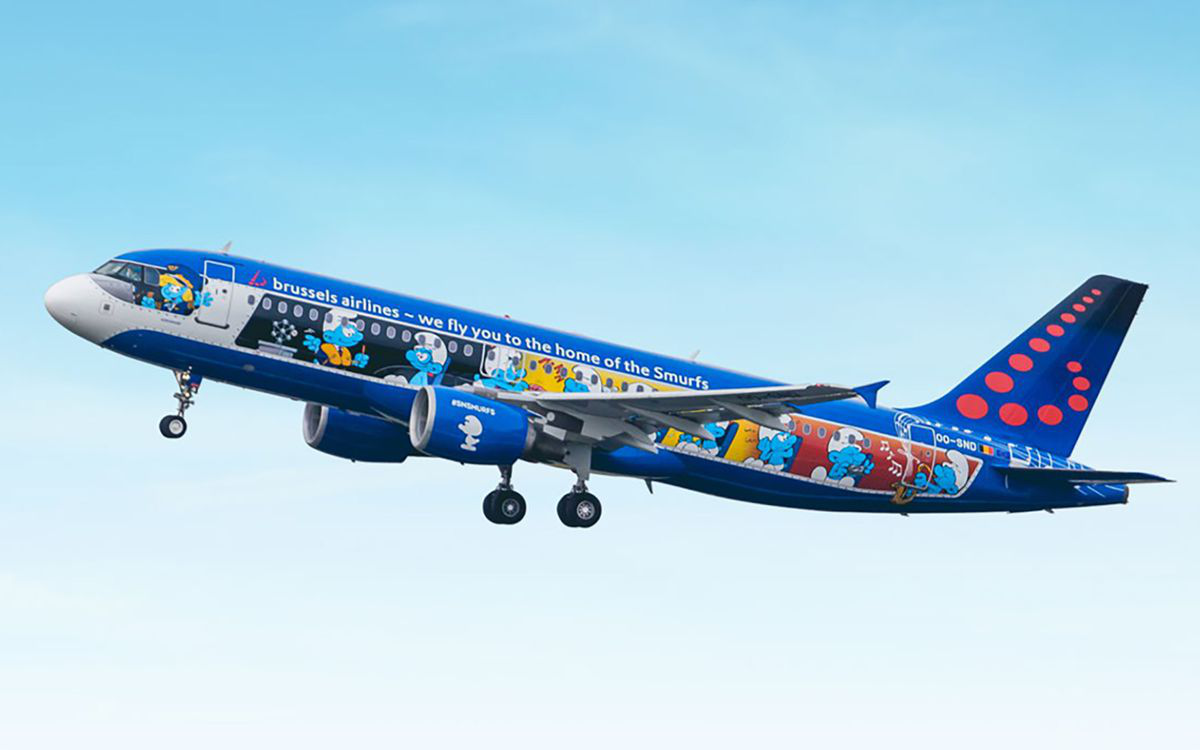

In [14]:
display(img1)
display(img2)
display(img3)

In [15]:
img1 = preprocess(img1)
img2 = preprocess(img2)
img3 = preprocess(img3)

In [16]:
display(img1)
display(img2)
display(img3)

tensor([[[ 0.5536,  0.5707,  0.4679,  ..., -0.7650, -0.7137, -0.2171],
         [ 0.6049,  0.6049,  0.5707,  ..., -0.7993, -0.8164, -0.6109],
         [ 0.3309,  0.3652,  0.1939,  ..., -1.2788, -1.3130, -1.3815],
         ...,
         [ 1.0159,  1.0331,  1.0331,  ...,  1.1529,  1.1529,  1.1187],
         [ 1.0159,  1.0331,  1.0331,  ...,  1.1529,  1.1529,  1.1187],
         [ 1.0159,  1.0159,  1.0159,  ...,  1.1358,  1.1358,  1.1529]],

        [[ 0.5378,  0.5728,  0.4853,  ..., -0.5476, -0.4776,  0.0301],
         [ 0.6078,  0.5903,  0.5378,  ..., -0.5476, -0.5126, -0.3025],
         [ 0.3102,  0.3277,  0.1001,  ..., -1.0203, -0.9853, -1.0728],
         ...,
         [ 1.1681,  1.1856,  1.1856,  ...,  1.3081,  1.3081,  1.2731],
         [ 1.1681,  1.1856,  1.1856,  ...,  1.3081,  1.3081,  1.2731],
         [ 1.1681,  1.1681,  1.1681,  ...,  1.2906,  1.2906,  1.3081]],

        [[ 0.4614,  0.4962,  0.3916,  ..., -0.6890, -0.6541, -0.1312],
         [ 0.4614,  0.4439,  0.4091,  ..., -0

tensor([[[2.0948, 2.0948, 2.0948,  ..., 1.9920, 2.0092, 2.0263],
         [2.0948, 2.0948, 2.0948,  ..., 1.9920, 1.9920, 2.0092],
         [2.0948, 2.0948, 2.0948,  ..., 2.0263, 1.9749, 2.0092],
         ...,
         [1.8893, 1.8550, 1.8550,  ..., 1.9064, 1.9064, 1.9064],
         [1.8550, 1.8722, 1.8550,  ..., 1.9064, 1.9064, 1.8893],
         [1.8722, 1.8893, 1.8722,  ..., 1.9064, 1.8893, 1.9064]],

        [[1.6583, 1.6583, 1.6583,  ..., 1.6232, 1.6232, 1.6232],
         [1.6583, 1.6583, 1.6583,  ..., 1.6057, 1.6232, 1.6408],
         [1.6583, 1.6583, 1.6583,  ..., 1.6232, 1.5882, 1.6057],
         ...,
         [0.8880, 0.8704, 0.8880,  ..., 1.6933, 1.6933, 1.6933],
         [0.8529, 0.8529, 0.8704,  ..., 1.6933, 1.6758, 1.6933],
         [0.8354, 0.8704, 0.8704,  ..., 1.6933, 1.6933, 1.7283]],

        [[1.8034, 1.8034, 1.8034,  ..., 1.8034, 1.8208, 1.7860],
         [1.8034, 1.8034, 1.8034,  ..., 1.7685, 1.8208, 1.7860],
         [1.8034, 1.8034, 1.8034,  ..., 1.7685, 1.8208, 1.

tensor([[[0.1426, 0.1254, 0.1254,  ..., 0.5193, 0.5193, 0.5022],
         [0.1597, 0.1426, 0.1426,  ..., 0.5193, 0.5193, 0.5022],
         [0.1597, 0.1597, 0.1597,  ..., 0.5364, 0.5193, 0.5022],
         ...,
         [1.9407, 1.9407, 1.9407,  ..., 1.9407, 1.9407, 1.9407],
         [1.9407, 1.9407, 1.9407,  ..., 1.9407, 1.9407, 1.9407],
         [1.9407, 1.9407, 1.9407,  ..., 1.9578, 1.9578, 1.9578]],

        [[1.5707, 1.5707, 1.5707,  ..., 1.7108, 1.7108, 1.6933],
         [1.5882, 1.5707, 1.5707,  ..., 1.7108, 1.7108, 1.6933],
         [1.5882, 1.5882, 1.5882,  ..., 1.7283, 1.7108, 1.6933],
         ...,
         [2.3060, 2.3060, 2.3060,  ..., 2.3060, 2.3060, 2.3060],
         [2.3060, 2.3060, 2.3060,  ..., 2.3060, 2.3060, 2.3060],
         [2.3060, 2.3060, 2.3060,  ..., 2.2885, 2.2885, 2.2885]],

        [[2.3088, 2.2914, 2.2914,  ..., 2.3437, 2.3611, 2.3437],
         [2.3088, 2.2914, 2.2914,  ..., 2.3437, 2.3437, 2.3263],
         [2.3088, 2.3088, 2.3088,  ..., 2.3611, 2.3437, 2.

In [17]:
print(f"img1 shape: {img1.shape}")
print(f"img2 shape: {img2.shape}")
print(f"img3 shape: {img3.shape}")

img1 shape: torch.Size([3, 224, 224])
img2 shape: torch.Size([3, 224, 224])
img3 shape: torch.Size([3, 224, 224])


In [18]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
inp_batch = torch.stack([img1, img2, img3])

In [20]:
out_batch = resnet(inp_batch)

In [21]:
out_batch.shape

torch.Size([3, 1000])

In [22]:
torch.Size([3, 1000])

torch.Size([3, 1000])

In [23]:
!curl https://raw.githubusercontent.com/xmartlabs/caffeflow/master/examples/imagenet/imagenet-classes.txt > imagenet-classes.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21675  100 21675    0     0  52925      0 --:--:-- --:--:-- --:--:-- 53125


In [25]:
with open("imagenet-classes.txt", 'r') as f:
    labels = [line.strip() for line in f.readlines()]

In [26]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [27]:
index = torch.max(out_batch, dim=1)

In [28]:
index

torch.return_types.max(
values=tensor([17.0064, 12.8509, 12.3929], grad_fn=<MaxBackward0>),
indices=tensor([207, 281, 404]))

In [30]:
for idx in index.indices:
    print(labels[idx.item()])

golden retriever
tabby, tabby cat
airliner
